In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df = df.iloc[:,3:]
df = pd.concat([df,pd.get_dummies(df['Geography'])],axis=1)
df = df.drop(columns = ['Geography'])

In [8]:
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)
df = df.drop(columns = ['Gender'])

In [9]:
df = df.rename(columns = {'Male':'Gender'})

In [10]:
df.drop(columns=['Female'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
cols_to_scale = ['CreditScore', 'Age',	'Tenure',	'Balance',	'NumOfProducts', 'EstimatedSalary']

df[cols_to_scale] = sc.fit_transform(df[cols_to_scale])

In [13]:
X = df.drop(columns = ['Exited'])
Y = df.Exited
X = np.asarray(X, dtype=np.float32)
Y= np.asarray(Y, dtype=np.float32)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(23, activation ='relu',input_shape=(13,)),
    keras.layers.Dense(18, activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=50,batch_size=32)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.5398 - accuracy: 0.7176
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8126
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8379
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8495
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3550 - accuracy: 0.8514
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8551
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8541
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8560
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8570
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8580

In [17]:
Y_pred = model.predict(X_test)
Y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.02092276],
       [0.02197085],
       [0.04214767],
       ...,
       [0.37910092],
       [0.5307685 ],
       [0.05082311]], dtype=float32)

In [19]:
Y_pred_binary = (Y_pred>=0.5).astype(int)

In [20]:
Y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
cm = confusion_matrix(Y_test,Y_pred_binary)

In [23]:
import seaborn as sns

<Axes: >

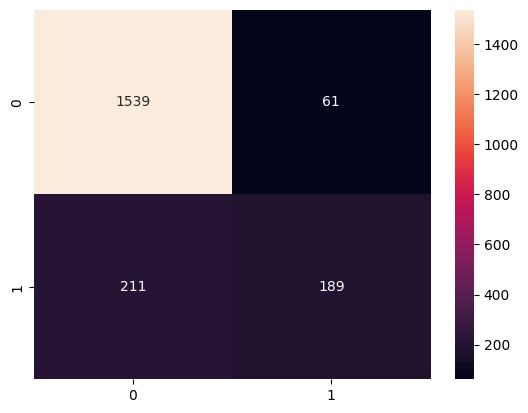

In [24]:
sns.heatmap(cm,annot=True,fmt='d')

In [25]:
accuracy_score(Y_test,Y_pred_binary)

0.864